In [1]:
# step 01
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset
data = pd.read_csv("ndtv_data_final.csv")

# Display the first few rows
print(data.head())

# Check dataset info
print(data.info())

# Check for missing values
print(data.isnull().sum())


   Unnamed: 0                            Name    Brand  \
0           0  OnePlus 7T Pro McLaren Edition  OnePlus   
1           1                   Realme X2 Pro   Realme   
2           2               iPhone 11 Pro Max    Apple   
3           3                       iPhone 11    Apple   
4           4                    LG G8X ThinQ       LG   

                    Model  Battery capacity (mAh)  Screen size (inches)  \
0  7T Pro McLaren Edition                    4085                  6.67   
1                  X2 Pro                    4000                  6.50   
2       iPhone 11 Pro Max                    3969                  6.50   
3               iPhone 11                    3110                  6.10   
4               G8X ThinQ                    4000                  6.40   

  Touchscreen  Resolution x  Resolution y  Processor  ...  Rear camera  \
0         Yes          1440          3120          8  ...         48.0   
1         Yes          1080          2400          8

In [4]:
# Fill missing numerical values with the mean
numerical_columns = ['Battery capacity (mAh)', 'Screen size (inches)', 
                     'RAM (MB)', 'Internal storage (GB)', 
                     'Rear camera', 'Front camera']
data[numerical_columns] = data[numerical_columns].fillna(data[numerical_columns].mean())

In [5]:
data = data.drop(['Unnamed: 0', 'Name', 'Model'], axis=1)

In [6]:
X = data.drop("Price", axis=1)  # Features
y = data["Price"]  # Target

In [7]:
#Split Data into Training and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Define categorical and numerical columns
categorical_columns = ['Brand', 'Touchscreen', 'Operating system', 'Wi-Fi', 
                       'Bluetooth', 'GPS', '3G', '4G/ LTE']
numerical_columns = ['Battery capacity (mAh)', 'Screen size (inches)', 
                     'Resolution x', 'Resolution y', 'Processor', 
                     'RAM (MB)', 'Internal storage (GB)', 
                     'Rear camera', 'Front camera', 'Number of SIMs']

# Preprocessing for numerical data
numerical_transformer = StandardScaler()

# Preprocessing for categorical data
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Combine transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ])


In [9]:
# Create the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(random_state=42))
])

In [10]:
# Train the pipeline
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Battery capacity (mAh)',
                                                   'Screen size (inches)',
                                                   'Resolution x',
                                                   'Resolution y', 'Processor',
                                                   'RAM (MB)',
                                                   'Internal storage (GB)',
                                                   'Rear camera',
                                                   'Front camera',
                                                   'Number of SIMs']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Brand', 'Touchscreen',
                                                   'Operating system', 'Wi-Fi',
                                                   'Bluetooth', 'GPS', '3G',
                                                   '4G/ LTE'])])),
                ('model', RandomForestRegressor(random_state=42))])

In [11]:
# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"R2 Score: {r2:.2f}")

Mean Squared Error: 87318911.79
Mean Absolute Error: 3650.87
R2 Score: 0.67


In [20]:
# Define parameter grid
param_grid = {
    'model__n_estimators': [50, 100, 200],
    'model__max_depth': [None, 10, 20],
    'model__min_samples_split': [2, 5, 10],
}

# Perform grid search
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# Display best parameters
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'model__max_depth': 20, 'model__min_samples_split': 10, 'model__n_estimators': 50}


In [21]:
best_model = grid_search.best_estimator_

# Evaluate the optimized model
y_pred_optimized = best_model.predict(X_test)

# Evaluate performance
mse_optimized = mean_squared_error(y_test, y_pred_optimized)
r2_optimized = r2_score(y_test, y_pred_optimized)

print(f"Optimized Mean Squared Error: {mse_optimized:.2f}")
print(f"Optimized R2 Score: {r2_optimized:.2f}")


Optimized Mean Squared Error: 96748215.23
Optimized R2 Score: 0.63


In [22]:
import joblib

# Save the model
joblib.dump(best_model, "Phone_price_prediction_model.pkl")

# Load the model
loaded_model = joblib.load("Phone_price_prediction_model.pkl")


In [41]:
import joblib

# Load the saved pipeline
loaded_pipeline = joblib.load("Phone_price_prediction_model.pkl")

In [23]:
# Example new data
new_data = pd.DataFrame({
    'Brand': ['Samsung'], 
    'Battery capacity (mAh)': [4000], 
    'Screen size (inches)': [6.4],
    'Touchscreen': ['Yes'], 
    'Resolution x': [1080], 
    'Resolution y': [2400], 
    'Processor': [2], 
    'RAM (MB)': [4000], 
    'Internal storage (GB)': [128], 
    'Rear camera': [64.0], 
    'Front camera': [32.0], 
    'Operating system': ['Android'], 
    'Wi-Fi': ['Yes'], 
    'Bluetooth': ['Yes'], 
    'GPS': ['Yes'], 
    'Number of SIMs': [2], 
    '3G': ['Yes'], 
    '4G/ LTE': ['Yes']
})

# Predict the price in INR
predicted_price_inr = loaded_model.predict(new_data)[0]

# Convert to USD (using exchange rate: 1 INR = 0.012 USD)
exchange_rate = 0.012
predicted_price_usd = predicted_price_inr * exchange_rate

# Display the result
#print(f"Predicted Price in INR: ₹{predicted_price_inr:.2f}")
print(f"Predicted Price in USD: ${predicted_price_usd:.2f}")


Predicted Price in USD: $220.02


In [24]:
# Example new data
new_data = pd.DataFrame({
    'Brand': ['Samsung'], 
    'Battery capacity (mAh)': [4000], 
    'Screen size (inches)': [6.4],
    'Touchscreen': ['Yes'], 
    'Resolution x': [1080], 
    'Resolution y': [2400], 
    'Processor': [2], 
    'RAM (MB)': [4000], 
    'Internal storage (GB)': [128], 
    'Rear camera': [64.0], 
    'Front camera': [32.0], 
    'Operating system': ['Android'], 
    'Wi-Fi': ['Yes'], 
    'Bluetooth': ['Yes'], 
    'GPS': ['Yes'], 
    'Number of SIMs': [2], 
    '3G': ['Yes'], 
    '4G/ LTE': ['Yes']
})

# Predict the price in INR
predicted_price_inr = loaded_model.predict(new_data)[0]

# Convert to PKR (assuming an exchange rate of 1 INR = 230 PKR)
exchange_rate_inr_to_pkr = 230
predicted_price_pkr = predicted_price_inr * exchange_rate_inr_to_pkr

# Convert to USD (using exchange rate: 1 INR = 0.012 USD)
exchange_rate_inr_to_usd = 0.012
predicted_price_usd = predicted_price_inr * exchange_rate_inr_to_usd

# Display the results
print(f"Predicted Price in PKR: ₨{predicted_price_pkr:.2f}")
print(f"Predicted Price in USD: ${predicted_price_usd:.2f}")

Predicted Price in PKR: ₨4217144.17
Predicted Price in USD: $220.02


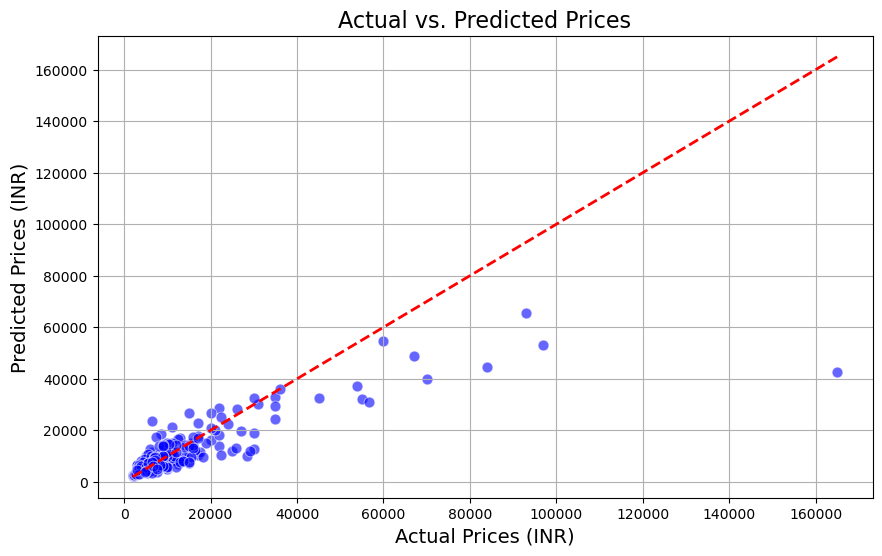

In [25]:
# Predict prices on the test set
y_pred = loaded_model.predict(X_test)

# Scatter plot: Actual vs. Predicted Prices
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, color="blue", alpha=0.6, s=60)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Perfect prediction line
plt.title("Actual vs. Predicted Prices", fontsize=16)
plt.xlabel("Actual Prices (INR)", fontsize=14)
plt.ylabel("Predicted Prices (INR)", fontsize=14)
plt.grid(True)
plt.show()


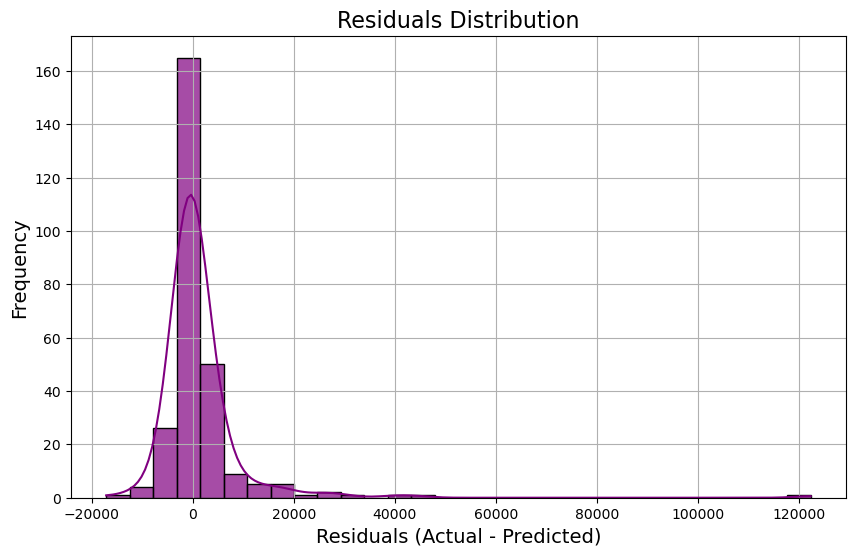

In [26]:
# Calculate residuals
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color="purple", bins=30, alpha=0.7)
plt.title("Residuals Distribution", fontsize=16)
plt.xlabel("Residuals (Actual - Predicted)", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(True)
plt.show()


C:\Users\ms\AppData\Local\Temp\ipykernel_6432\841498348.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')


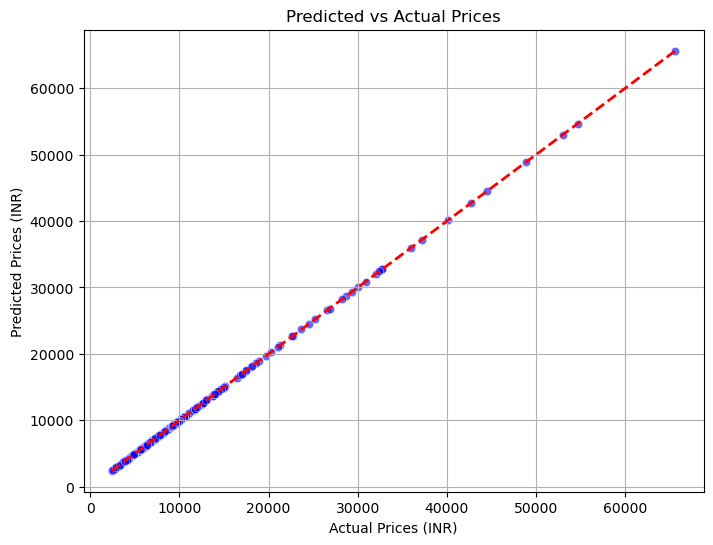

In [38]:
# Predict on the test set
y_test = loaded_model.predict(X_test)

# Scatter plot for predicted vs actual values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_test, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')
plt.title('Predicted vs Actual Prices')
plt.xlabel('Actual Prices (INR)')
plt.ylabel('Predicted Prices (INR)')
plt.grid(True)
plt.show();


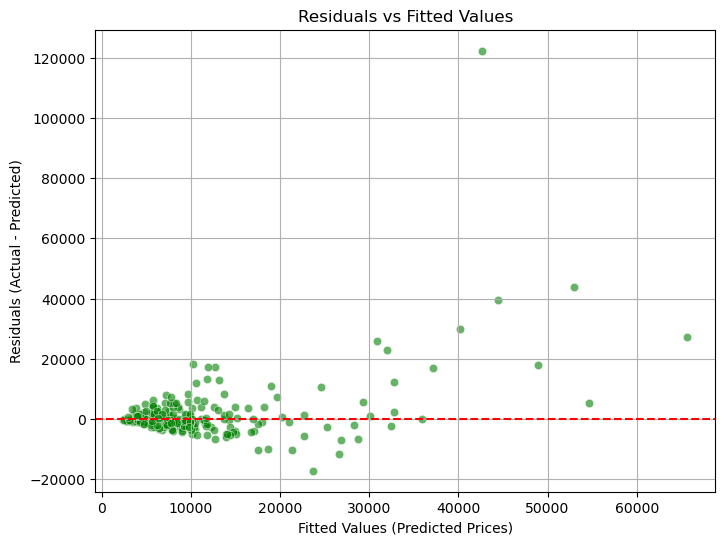

In [34]:
# Residuals vs Fitted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=residuals, color='green', alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values (Predicted Prices)')
plt.ylabel('Residuals (Actual - Predicted)')
plt.grid(True)
plt.show()


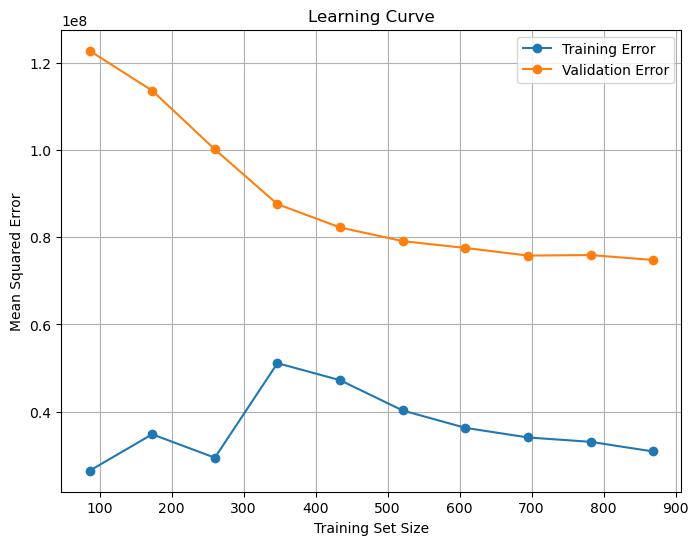

In [43]:
from sklearn.model_selection import learning_curve

# Generate learning curve data
train_sizes, train_scores, test_scores = learning_curve(
    loaded_pipeline, X_train, y_train, cv=5, scoring='neg_mean_squared_error',
    train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calculate mean and std for scores
train_scores_mean = -train_scores.mean(axis=1)
test_scores_mean = -test_scores.mean(axis=1)

# Plot learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, label='Training Error', marker='o')
plt.plot(train_sizes, test_scores_mean, label='Validation Error', marker='o')
plt.title('Learning Curve')
plt.xlabel('Training Set Size')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)
plt.show()
